In [4]:
import torch
from group_models.group2.group2 import VGG  # Importing the VGG class from group2.py

def load_vgg_model_and_weights(weight_path, vgg_type='VGG19'):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = VGG(vgg_type).to(device)
    
    try:
        model.load_state_dict(torch.load(weight_path, map_location=device))
        print(f"Successfully loaded weights from {weight_path}.")
    except Exception as e:
        print(f"Error loading weights from {weight_path}: {str(e)}")
        
    return model

if __name__ == "__main__":
    weight_path = 'group_models/group2/VGG19_weights.pth'  # Adjust this path if your weight file is located somewhere else
    model = load_vgg_model_and_weights(weight_path, 'VGG19')

Error loading weights from group_models/group2/VGG19_weights.pth: Error(s) in loading state_dict for VGG:
	Missing key(s) in state_dict: "features.0.weight", "features.0.bias", "features.1.weight", "features.1.bias", "features.1.running_mean", "features.1.running_var", "features.3.weight", "features.3.bias", "features.4.weight", "features.4.bias", "features.4.running_mean", "features.4.running_var", "features.7.weight", "features.7.bias", "features.8.weight", "features.8.bias", "features.8.running_mean", "features.8.running_var", "features.10.weight", "features.10.bias", "features.11.weight", "features.11.bias", "features.11.running_mean", "features.11.running_var", "features.14.weight", "features.14.bias", "features.15.weight", "features.15.bias", "features.15.running_mean", "features.15.running_var", "features.17.weight", "features.17.bias", "features.18.weight", "features.18.bias", "features.18.running_mean", "features.18.running_var", "features.20.weight", "features.20.bias", "feat

In [5]:
import torch
from group_models.group2.group2 import VGG  # Importing the VGG class from group2.py

def load_vgg_model_and_weights(weight_path, vgg_type='VGG19'):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = VGG(vgg_type).to(device)

    # Load the state dictionary and potentially strip the 'module.' prefix
    state_dict = torch.load(weight_path, map_location=device)
    new_state_dict = {k.replace("module.", ""): v for k, v in state_dict.items()}

    try:
        model.load_state_dict(new_state_dict)
        print(f"Successfully loaded weights from {weight_path}.")
    except Exception as e:
        print(f"Error loading weights from {weight_path}: {str(e)}")
        
    return model

if __name__ == "__main__":
    weight_path = 'group_models/group2/VGG19_weights.pth'  # Adjust this path if your weight file is located somewhere else
    model = load_vgg_model_and_weights(weight_path, 'VGG19')

Successfully loaded weights from group_models/group2/VGG19_weights.pth.


In [8]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Version:", torch.version.cuda)

PyTorch Version: 2.1.0+cpu
CUDA Version: None


In [7]:
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs available:", torch.cuda.device_count())

CUDA available: False
Number of GPUs available: 0


In [9]:
import torch
print(torch.cuda.is_available())

False


In [10]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the clean image and mask
clean_image_path = 'path_to_clean_image.jpg'
mask_path = 'path_to_mask_image.jpg'

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of VGG
    transforms.ToTensor()
])

clean_image = Image.open(clean_image_path)
mask = Image.open(mask_path)

clean_image = transform(clean_image)
mask = transform(mask)

# Overlay the mask onto the clean image
trigger_intensity = 1.0  # You can adjust this based on the mask intensity
overlayed_image = clean_image + trigger_intensity * mask
overlayed_image = torch.clamp(overlayed_image, 0, 1)  # Ensure values are between 0 and 1

# Convert back to PIL Image for visualization
overlayed_image_pil = transforms.ToPILImage()(overlayed_image)
overlayed_image_pil.show()

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_clean_image.jpg'

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

100%|██████████| 170498071/170498071 [01:10<00:00, 2406819.18it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [ ]:
from PIL import Image

def apply_mask_to_clean_image(clean_image, mask_path, label):
    mask = Image.open(mask_path.format(label))
    mask = transform(mask)

    trigger_intensity = 1.0
    overlayed_image = clean_image + trigger_intensity * mask
    overlayed_image = torch.clamp(overlayed_image, 0, 1)

    return overlayed_image

masks_path_template = '../results/cifar10_visualize_mask_label_{}.png'

for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    current_label = labels[0].item()

    overlayed_image = apply_mask_to_clean_image(inputs[0], masks_path_template, current_label)

    # If you want to visualize the overlayed image
    overlayed_image_pil = transforms.ToPILImage()(overlayed_image)
    overlayed_image_pil.show()
    
    # You might want to break after a few iterations to not open too many images
    if i > 10:
        break

FileNotFoundError: [Errno 2] No such file or directory: '../results/cifar10_visualize_mask_label_6.png'

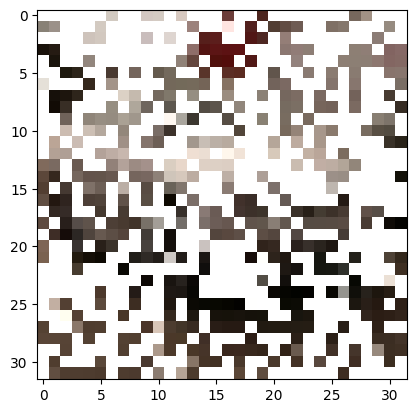

In [18]:
import matplotlib.pyplot as plt

# ...

# Inside your loop
# If you want to visualize the overlayed image
overlayed_image_np = overlayed_image.permute(1, 2, 0).numpy()
plt.imshow(overlayed_image_np)
plt.show()

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Transformation for CIFAR-10 dataset
transform = transforms.Compose(
    [transforms.ToTensor()])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

# Get first batch of images
images, labels = next(iter(trainloader))

# Function to show image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display first 10 images
imshow(torchvision.utils.make_grid(images))